In [1]:
from sklearn.datasets import load_breast_cancer
Breastcancer = load_breast_cancer()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
X = Breastcancer.data
scale = StandardScaler()
df = pd.DataFrame(data=scale.fit_transform(X),columns=Breastcancer.feature_names)
df['Outcome'] = Breastcancer.target

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Outcome
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [5]:
df.corr().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Outcome
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,0.679,-0.097,0.674,0.736,-0.223,0.206,0.194,0.376,-0.104,-0.043,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007,-0.730
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,0.276,0.386,0.282,0.260,0.007,0.192,0.143,0.164,0.009,0.054,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119,-0.415
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,0.692,-0.087,0.693,0.745,-0.203,0.251,0.228,0.407,-0.082,-0.006,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051,-0.743
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,0.733,-0.066,0.727,0.800,-0.167,0.213,0.208,0.372,-0.072,-0.020,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004,-0.709
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,0.301,0.068,0.296,0.247,0.332,0.319,0.248,0.381,0.201,0.284,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499,-0.359
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,0.497,0.046,0.549,0.456,0.135,0.739,0.571,0.642,0.230,0.507,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687,-0.597
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,0.632,0.076,0.660,0.617,0.099,0.670,0.691,0.683,0.178,0.449,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515,-0.696
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,0.698,0.021,0.711,0.690,0.028,0.490,0.439,0.616,0.095,0.258,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369,-0.777
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,0.303,0.128,0.314,0.224,0.187,0.422,0.343,0.393,0.449,0.332,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438,-0.330
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,0.000,0.164,0.040,-0.090,0.402,0.560,0.447,0.341,0.345,0.688,-0.254,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767,0.013


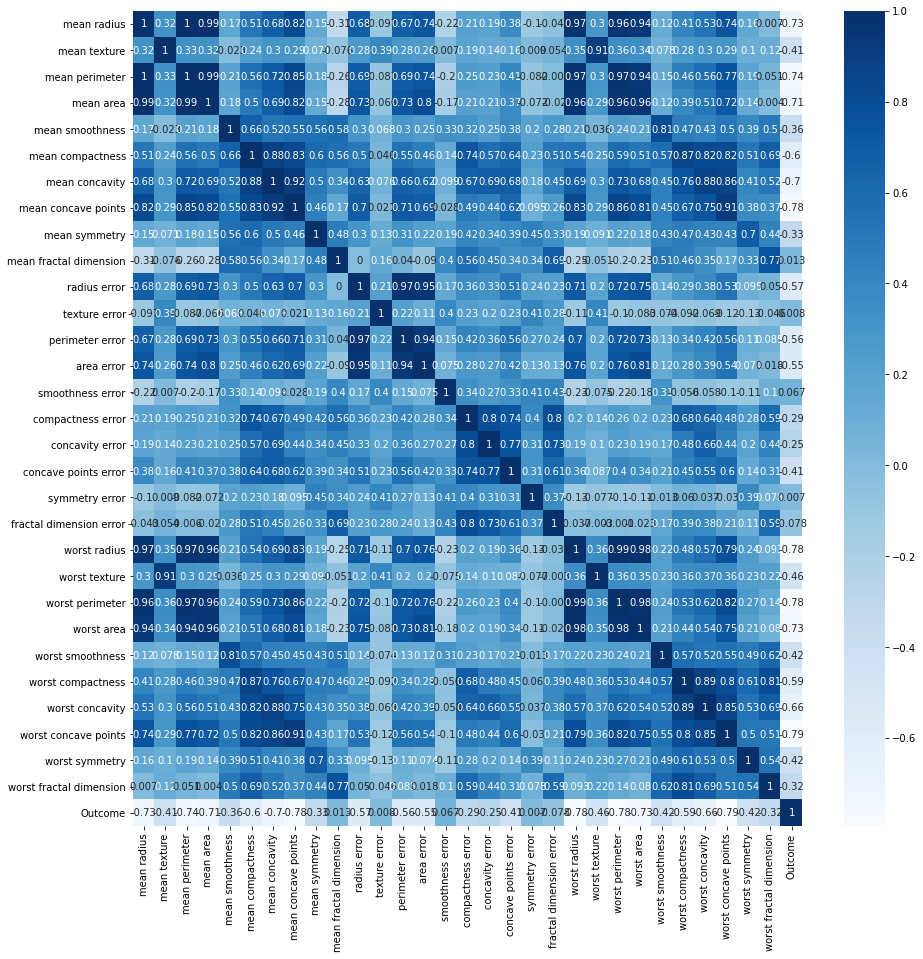

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().round(3),annot=True,cmap='Blues')
plt.show()

In [7]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [8]:
print('Covarience Matrix \n',np.cov(X,bias=True))

Covarience Matrix 
 [[ 1.5308879   0.238511    0.44117663 ... -0.38780116  0.4036854
  -0.50073147]
 [ 0.238511    0.82812454  0.44508795 ...  0.24233565  0.1033373
  -0.29929278]
 [ 0.44117663  0.44508795  0.47753714 ...  0.1164958   0.28116638
  -0.36367809]
 ...
 [-0.38780116  0.24233565  0.1164958  ...  0.47829373  0.1822317
   0.07836696]
 [ 0.4036854   0.1033373   0.28116638 ...  0.1822317   0.80901118
  -0.22254611]
 [-0.50073147 -0.29929278 -0.36367809 ...  0.07836696 -0.22254611
   0.85527163]]


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)

print("Eigenvalues:")
print(pca.explained_variance_)
print()
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
print("EigenVectors")
print(pca.components_)

Eigenvalues:
[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224]

Variances (Percentage):
[44.27202561 18.97118204  9.39316326  6.60213492  5.49576849  4.02452204]

EigenVectors
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675004e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83

In [10]:
transformed_df = pd.DataFrame(pca.transform(X), columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6'])
transformed_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541453
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226494


In [11]:
transformed_df.shape

(569, 6)

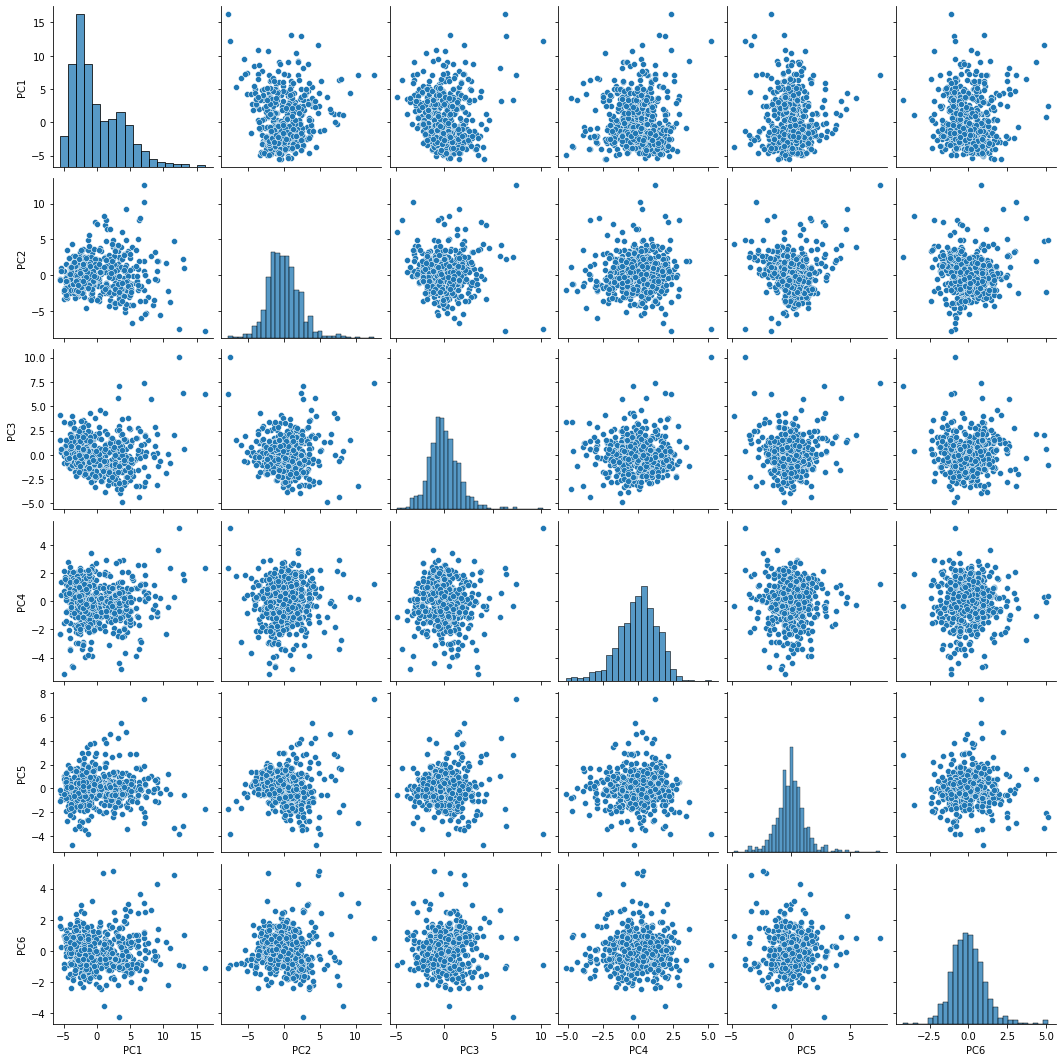

In [12]:
sns.pairplot(transformed_df)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(transformed_df, y, test_size=0.25, random_state=30)

In [14]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy =',accuracy_score(lr.predict(X_test),y_test)*100,'%')

Accuracy = 97.9020979020979 %
